# <center>${\textbf{Deep Learning}}$</center><br><center>${\textbf{ Artificial Neural Network :  ANN}}$</center><br><center>${\textbf{Heart Failure Prediction}}$</center>


${\textbf{Cardiovascular diseases (CVDs): }}$  are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 
Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:
* coronary heart disease – a disease of the blood vessels supplying the heart muscle;
* cerebrovascular disease – a disease of the blood vessels supplying the brain;
* peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
* rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
* congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and
* deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.

${\textbf{What are the risk factors for cardiovascular disease? }}$ 

The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risks factors” can be measured in primary care facilities and indicate an increased risk of heart attack, stroke, heart failure and other complications.

Cessation of tobacco use, reduction of salt in the diet, eating more fruit and vegetables, regular physical activity and avoiding harmful use of alcohol have been shown to reduce the risk of cardiovascular disease. Health policies that create conducive environments for making healthy choices affordable and available are essential for motivating people to adopt and sustain healthy behaviours.

There are also a number of underlying determinants of CVDs. These are a reflection of the major forces driving social, economic and cultural change – globalization, urbanization and population ageing. Other determinants of CVDs include poverty, stress and hereditary factors.

In addition, drug treatment of hypertension, diabetes and high blood lipids are necessary to reduce cardiovascular risk and prevent heart attacks and strokes among people with these conditions. 

${\textbf{Why are cardiovascular diseases a development issue in low- and middle-income countries?}}$

At least three-quarters of the world's deaths from CVDs occur in low- and middle-income countries. People living in low- and middle-income countries often do not have the benefit of primary health care programmes for early detection and treatment of people with risk factors for CVDs. People in low- and middle-income countries who suffer from CVDs and other noncommunicable diseases have less access to effective and equitable health care services which respond to their needs. As a result, for many people in these countries detection is often late in the course of the disease and people die at a younger age from CVDs and other noncommunicable diseases, often in their most productive years.

The poorest people in low- and middle-income countries are most affected. At the household level, evidence is emerging that CVDs and other noncommunicable diseases contribute to poverty due to catastrophic health spending and high out-of-pocket expenditure. At the macro-economic level, CVDs place a heavy burden on the economies of low- and middle-income countries.

${\textbf{Symptoms of heart attacks and strokes : }}$ Often, there are no symptoms of the underlying disease of the blood vessels. A heart attack or stroke may be the first sign of underlying disease. Symptoms of a heart attack include:

* pain or discomfort in the centre of the chest; and/or
* pain or discomfort in the arms, the left shoulder, elbows, jaw, or back.

In addition the person may experience difficulty in breathing or shortness of breath; nausea or vomiting; light-headedness or faintness; a cold sweat; and turning pale. Women are more likely than men to have shortness of breath, nausea, vomiting, and back or jaw pain.
The most common symptom of a stroke is sudden weakness of the face, arm, or leg, most often on one side of the body. Other symptoms include sudden onset of:
* numbness of the face, arm, or leg, especially on one side of the body;
* confusion, difficulty speaking or understanding speech;
* difficulty seeing with one or both eyes;
* difficulty walking, dizziness and/or loss of balance or coordination;
* severe headache with no known cause; and/or
* fainting or unconsciousness.



In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [30]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks


${\textbf{Loading Automobile Prices Dataset}}$

In [4]:
HeartFailures =  pd.read_csv('heart_failure_clinical_records.csv', sep=",")

<center>${\textbf{Data OverView}}$<center> 

* Data Set Characteristics: Multivariate
* Number of Instances: 299
* Area: Life
* Attribute Characteristics: Integer, Real
* Number of Attributes: 13
* Date Donated: 2020-02-05
* Associated Tasks: Classification, Regression, Clustering
* Missing Values: Yes
* Number of Web Hits: 142826
    
${\textbf{Source: }}$
Provide the names, email addresses, institutions, and other contact information of the donors and creators of the data set.The original dataset version was collected by Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza (Government College University, Faisalabad, Pakistan) and made available by them on FigShare under the Attribution 4.0 International (CC BY 4.0: freedom to share and adapt the material) copyright in July 2017.
    
${\textbf{Context}}$
Cardiovascular diseases (CVDs) are the leading cause of mortality worldwide, killing an estimated 17.9 million people each year, accounting for 31% of all fatalities worldwide. Heart attacks and strokes cause four out of every five CVD fatalities, and one-third of these deaths occur in adults under the age of 70. CVDs are a common cause of heart failure, and this dataset contains 11 variables that can be used to predict heart disease.

People with cardiovascular disease or at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia, or pre-existing illness) require early identification and care, which a machine learning model may greatly assist with.


${\textbf{Attribute Information:}}$
Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)


${\textbf{Relevant Papers:}}$

Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza: "Survival analysis of heart failure patients: a case study". PLoS ONE 12(7), 0181001 (2017). 

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).

In [5]:
print(HeartFailures.shape)
HeartFailures.info()

(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
HeartFailures.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [7]:
HeartFailures.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

<center>${\textbf{Exploratory Data Analysis: EDA }}$<center>

We begin our analysis by plotting a count plot of the targer attribute. A corelation matrix od the various attributes to examine the feature importance.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

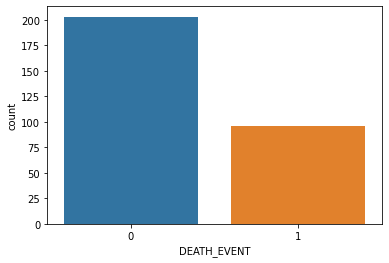

In [8]:
sns.countplot(x= HeartFailures["DEATH_EVENT"])

Point to note is that there is an imbalance in the data.

${\textbf{Examaning a corelation matrix of all the features}}$

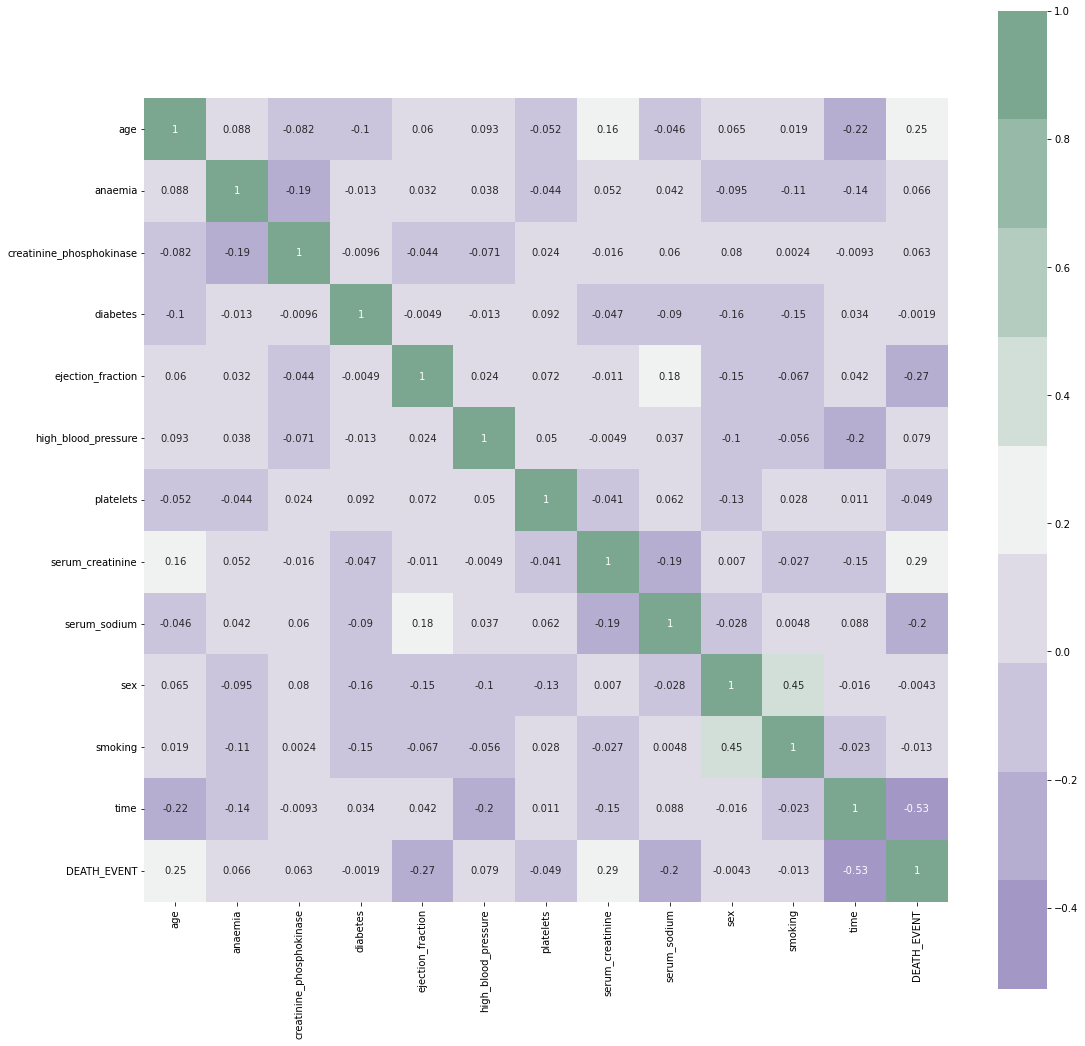

In [9]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = HeartFailures.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. <br>
Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.<br>
Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with age br>

${\textbf{Evauating age distrivution }}$

Text(0.5, 1.0, 'Distribution Of Age')

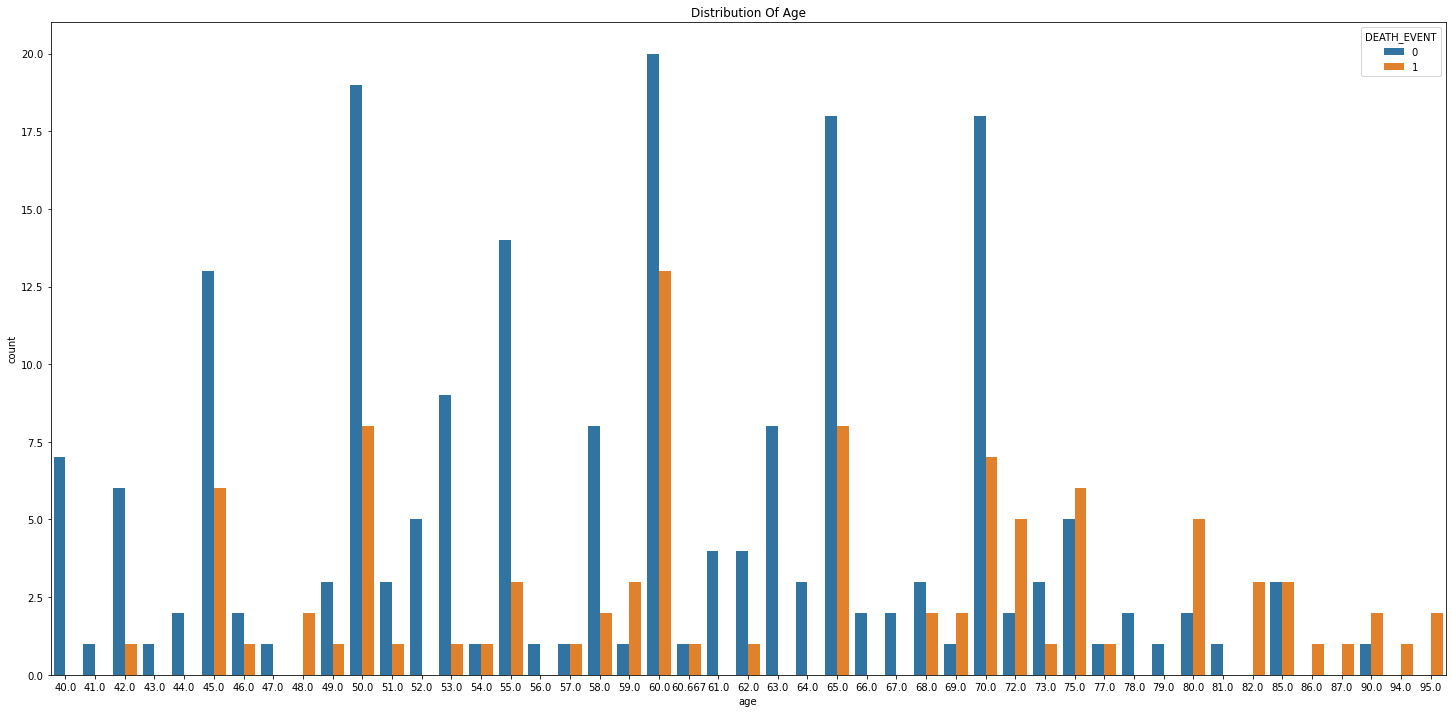

In [10]:
plt.figure(figsize=(25,12))
Days_of_week=sns.countplot(x=HeartFailures['age'],data=HeartFailures, hue ="DEATH_EVENT")
Days_of_week.set_title("Distribution Of Age")

${\textbf{Boxen and swarm plot of some non binary features}}$

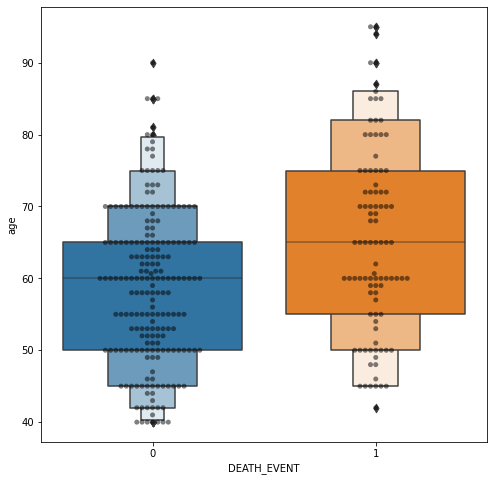

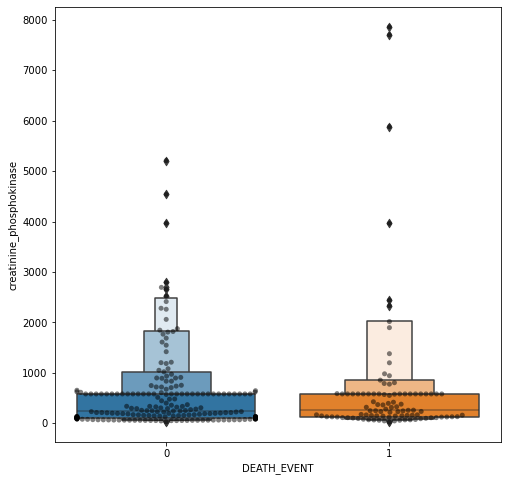

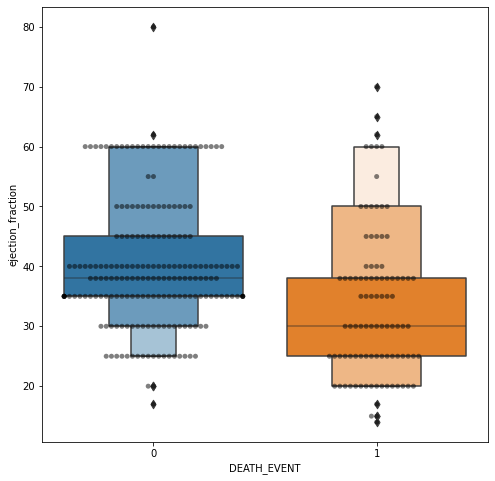

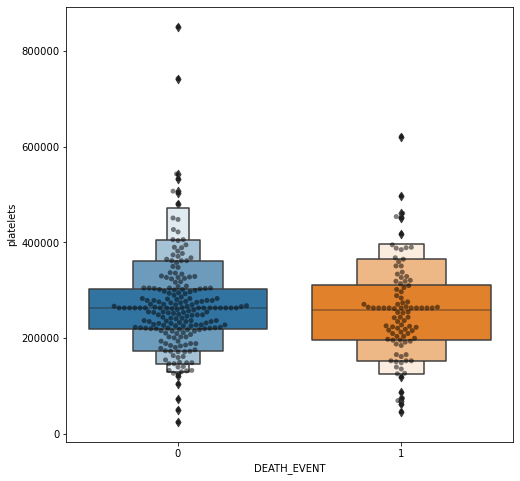

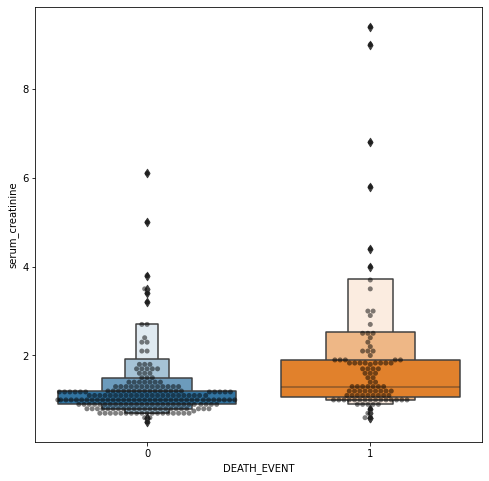

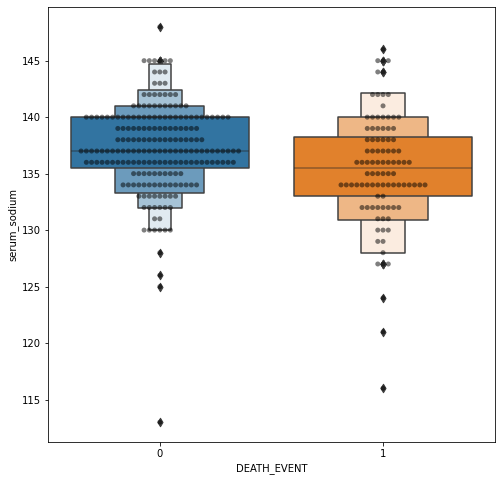

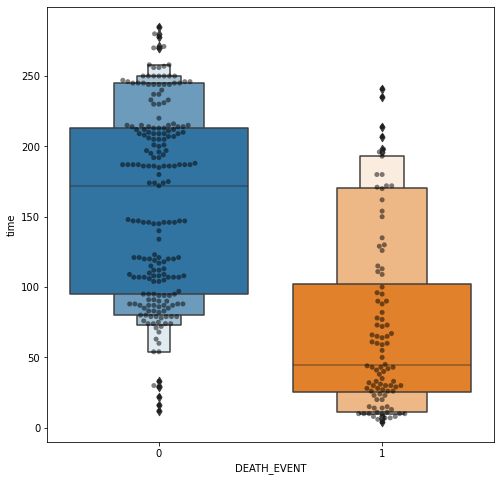

In [13]:
# 
feature = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=HeartFailures["DEATH_EVENT"], y=HeartFailures[i], color="black", alpha=0.5)
    sns.boxenplot(x=HeartFailures["DEATH_EVENT"], y=HeartFailures[i])
    plt.show()

I spotted outliers on our dataset. I didn't remove them yet as it may lead to overfitting. Though we may end up with better statistics. In this case, with medical data, the outliers may be an important deciding factor.

Next, we examine the kdeplot of time and age as they both are significant features.

<AxesSubplot:xlabel='time', ylabel='age'>

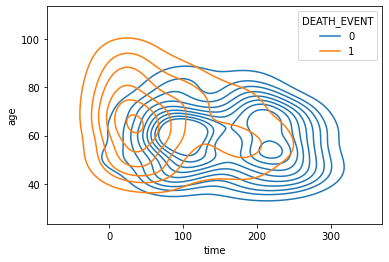

In [15]:
sns.kdeplot(x=HeartFailures["time"], y=HeartFailures["age"], hue =HeartFailures["DEATH_EVENT"])

In [17]:
HeartFailures.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

In [16]:
pp.ProfileReport(HeartFailures)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<center>${\textbf{Data Preprocessing}}$<center>

In [18]:
HeartFailures.replace("?", np.nan, inplace = True)

In [19]:
HeartFailures.isnull().sum() / len(HeartFailures) * 100 #Percentage of NaN data

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

as shown in the results above there's no missing data ,however we must adress the outlier proble

In [21]:
#assigning values to features as X and target as y
X=HeartFailures.drop(["DEATH_EVENT"],axis=1)
y=HeartFailures["DEATH_EVENT"]

${\textbf{Set up a standard scaler for the features}}$

In [25]:
col_names = list(X.columns)
s_scaler = StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

count          mean       std       min       25%  \
age                       299.0  5.265205e-16  1.001676 -1.754448 -0.828124   
anaemia                   299.0  3.594301e-16  1.001676 -0.871105 -0.871105   
creatinine_phosphokinase  299.0  3.713120e-18  1.001676 -0.576918 -0.480393   
diabetes                  299.0  1.113936e-16  1.001676 -0.847579 -0.847579   
ejection_fraction         299.0  3.341808e-18  1.001676 -2.038387 -0.684180   
high_blood_pressure       299.0 -4.841909e-16  1.001676 -0.735688 -0.735688   
platelets                 299.0  1.009969e-16  1.001676 -2.440155 -0.520870   
serum_creatinine          299.0 -2.227872e-18  1.001676 -0.865509 -0.478205   
serum_sodium              299.0 -8.627435e-16  1.001676 -5.363206 -0.595996   
sex                       299.0 -5.940993e-18  1.001676 -1.359272 -1.359272   
smoking                   299.0 -3.861645e-17  1.001676 -0.687682 -0.687682   
time                      299.0 -1.069379e-16  1.001676 -1.629502 -0.739000   

                               50%       75%       max  
age                      -0.070223  0.771889  2.877170  
anaemia                  -0.871105  1.147968  1.147968  
creatinine_phosphokinase -0.342574  0.000166  7.514640  
diabetes                 -0.847579  1.179830  1.179830  
ejection_fraction        -0.007077  0.585389  3.547716  
high_blood_pressure      -0.735688  1.359272  1.359272  
platelets                -0.013908  0.411120  6.008180  
serum_creatinine         -0.284552  0.005926  7.752020  
serum_sodium              0.085034  0.766064  2.582144  
sex                       0.735688  0.735688  0.735688  
smoking                  -0.687682  1.454161  1.454161  
time                     -0.196954  0.938759  1.997038

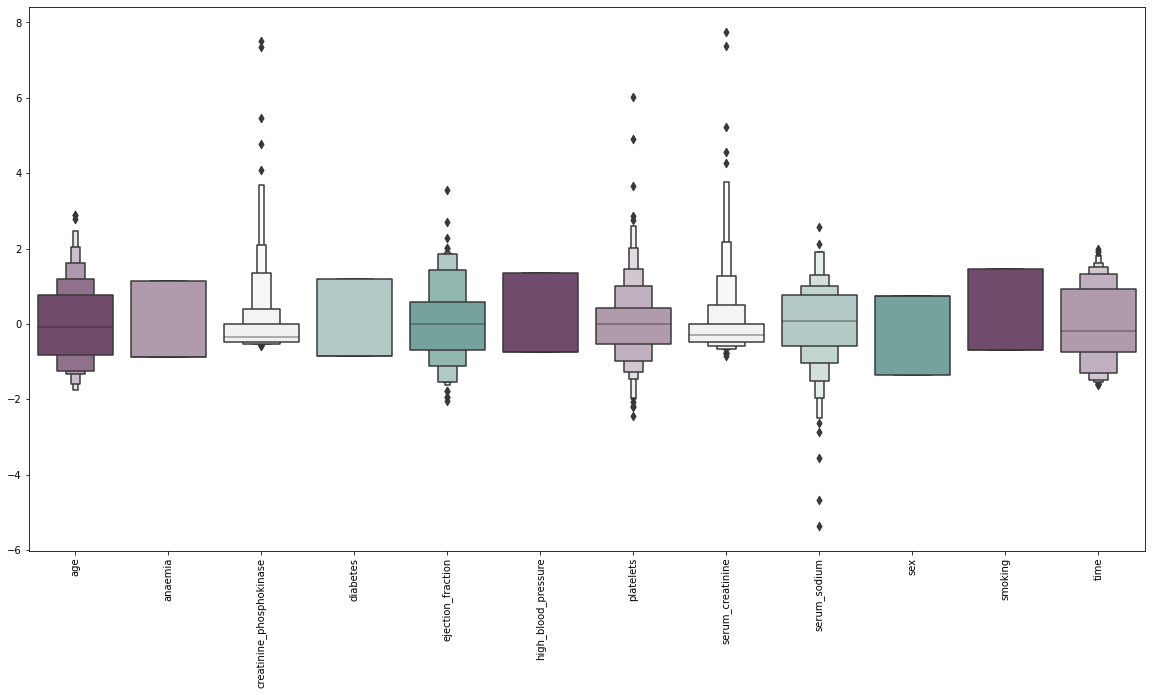

In [26]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

<center>${\textbf{Data Modeling}}$<center>

In [28]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

${\textbf{Artificial Neural Network}}$

In [31]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [32]:
# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16,activation = 'relu',input_dim = 12))
model.add(Dense(units = 8,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1,activation = 'sigmoid'))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 1.1461 - accuracy: 0.4022 - val_loss: 0.9817 - val_accuracy: 0.3333
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0817 - accuracy: 0.3575 - val_loss: 0.9348 - val_accuracy: 0.3333
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0296 - accuracy: 0.4581 - val_loss: 0.8957 - val_accuracy: 0.3333
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.9176 - accuracy: 0.4469 - val_loss: 0.8609 - val_accuracy: 0.3333
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.8511 - accuracy: 0.4860 - val_loss: 0.8327 - val_accuracy: 0.3333
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 0.8306 - accuracy: 0.4916 - val_loss: 0.8098 - val_accuracy: 0.3333
Epoch 7/500
6/6 [==============================] - 0s 5ms/step - loss: 0.8713 - accuracy: 0.4749 - val_loss: 0.7915 - val_accuracy: 0.3778
Epoch 8/500
6/6 [=========

In [34]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 67.31%


>${\textbf{Plotting training and validation loss over epochs}}$ 

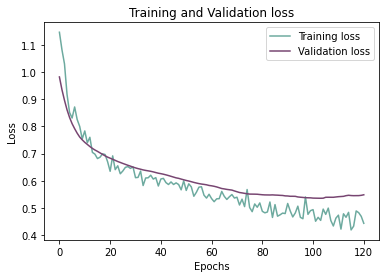

In [35]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

>${\textbf{Plotting training and validation accuracy over epochs}}$ 

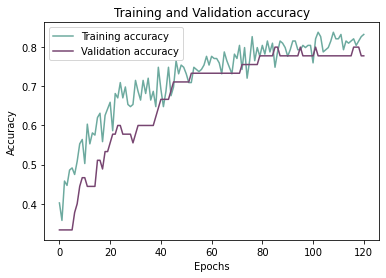

In [36]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<center>${\textbf{Conclusion}}$<center>

In [37]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 2ms/step


<AxesSubplot:>

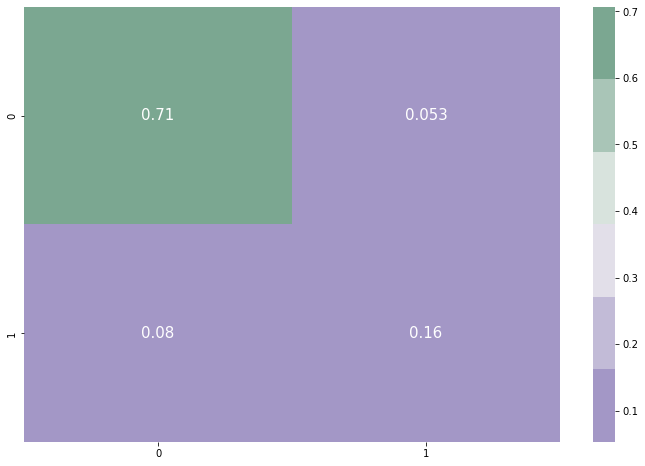

In [38]:
# confusion matrix
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        57
           1       0.75      0.67      0.71        18

    accuracy                           0.87        75
   macro avg       0.82      0.80      0.81        75
weighted avg       0.86      0.87      0.86        75

